In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm.autonotebook import tqdm, trange

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load model (encoder model)
model = SentenceTransformer("bert-base-nli-mean-tokens")
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [3]:
# Sample sentences
a = "This is First sentence."
b = "Hello"
c = "Hi"
d = "Brother and sister."
e = "Boy and Girl are playing in graden."
f = "Oh no, it is too slippery, Let me help you put it in."
g = "Seventh sentence."

In [4]:
# Encode sentences
sentence_embeddings = model.encode([a, b, c, d, e, f, g])
sentence_embeddings.shape

(7, 768)

In [5]:
# Calculate the similarities
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

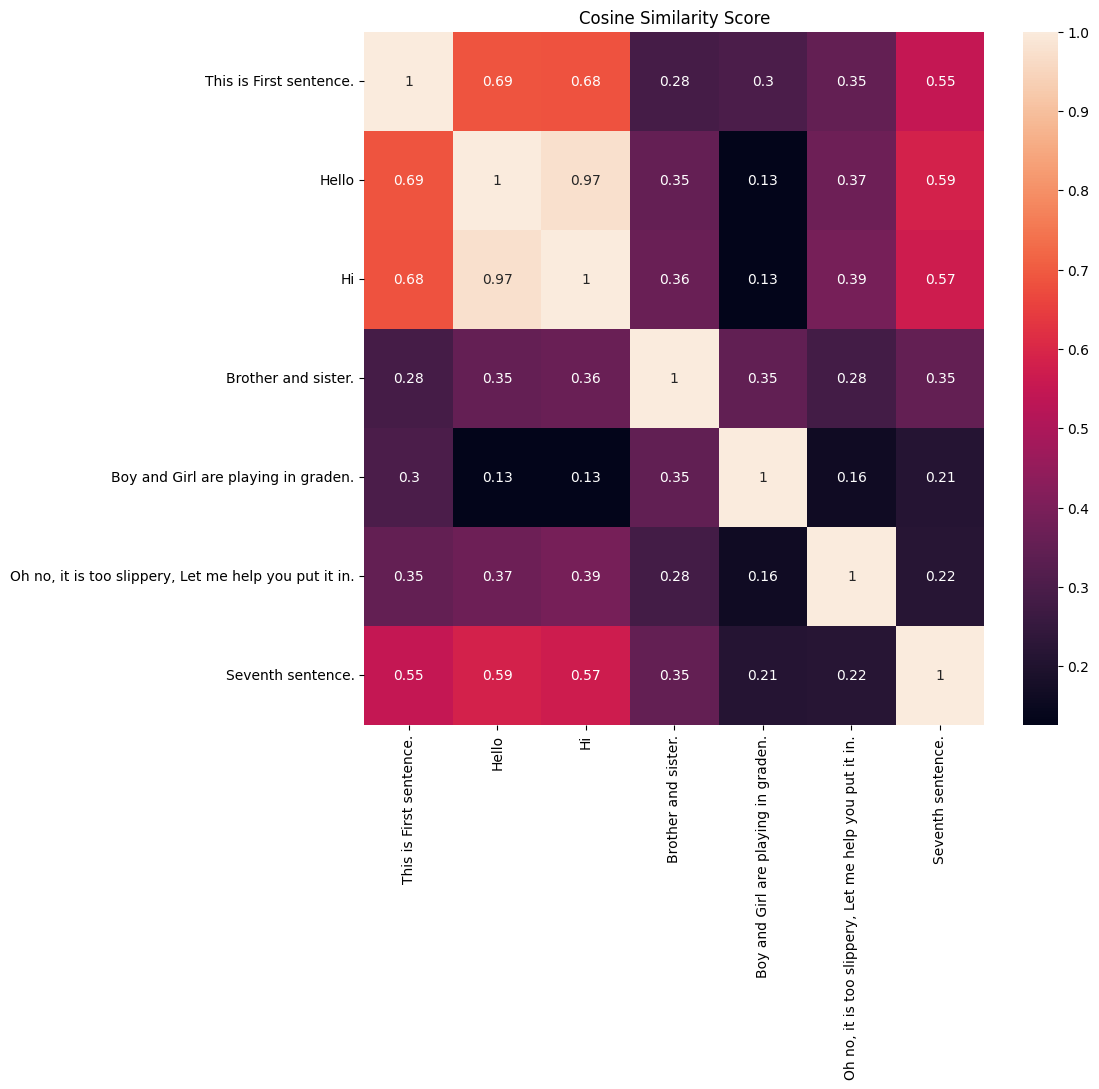

In [6]:
# Plot heatmap
plt.figure(figsize=(10, 9))
labels = [a, b, c, d, e, f, g]
plt.title("Cosine Similarity Score")
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()